# Telco Customer Churn Prediction

## Problem Statement
Customer churn is a major problem for telecom companies.
The goal of this project is to predict whether a customer will leave the company
based on their demographic information, service usage, and contract details.


1-**Import** **Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



**2-Load Dataset**

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape


(7043, 21)

- Dataset: Telco Customer Churn
- Rows: 7043
- Target Variable: Churn
- Problem Type: Binary Classification


**3-Initial Data Exploration**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include='all')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
df.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# **4-Data Cleaning**

In [ ]:
df.drop(columns=['customerID'], inplace=True)


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(df[col].value_counts())


gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

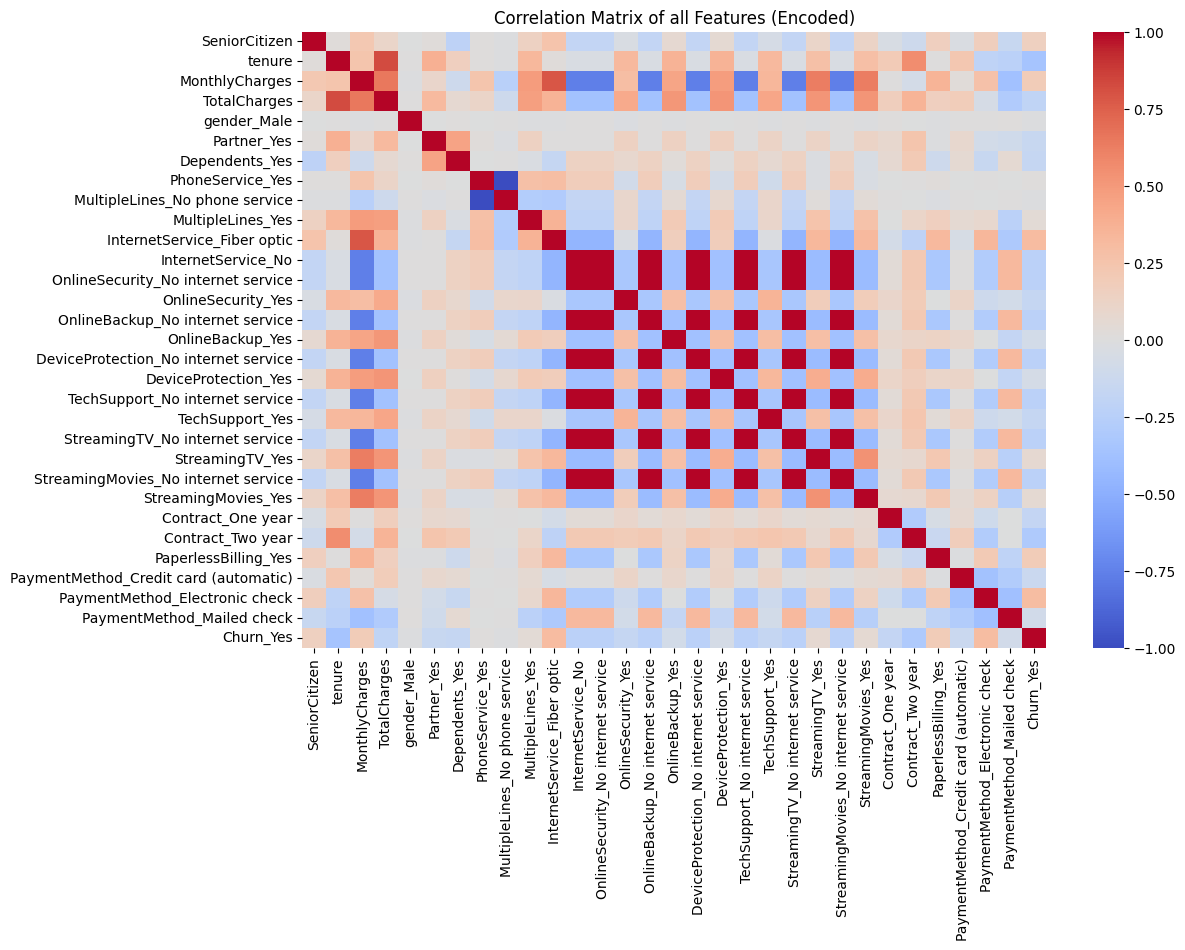

In [ ]:
plt.figure(figsize=(12,8))

# Create a copy of the DataFrame for correlation calculation to avoid modifying the original df
df_encoded = df.copy()

# Identify categorical columns (excluding 'Churn' which is already mapped to 0/1)
categorical_cols = df_encoded.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding to these categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Now calculate correlation on the encoded DataFrame
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm') # annot=False to prevent too much text on large heatmap
plt.title('Correlation Matrix of all Features (Encoded)')
plt.show()

In [ ]:
df.dropna(inplace=True)
df.duplicated().sum()



np.int64(22)

**5-Exploratory Data Analysis (EDA)**

We analyze the relationship between churn and contract type.


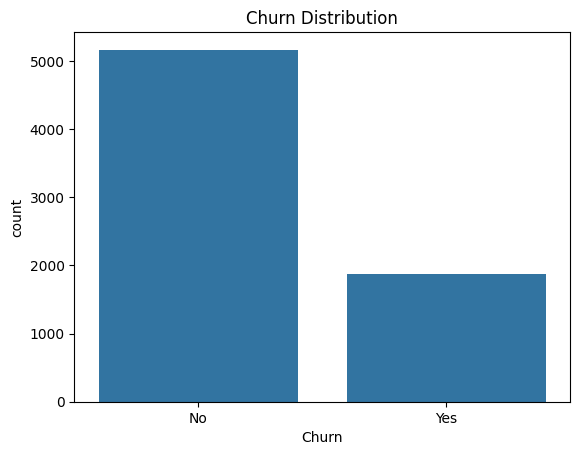

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


The dataset is imbalanced, with more non-churned customers than churned customers.


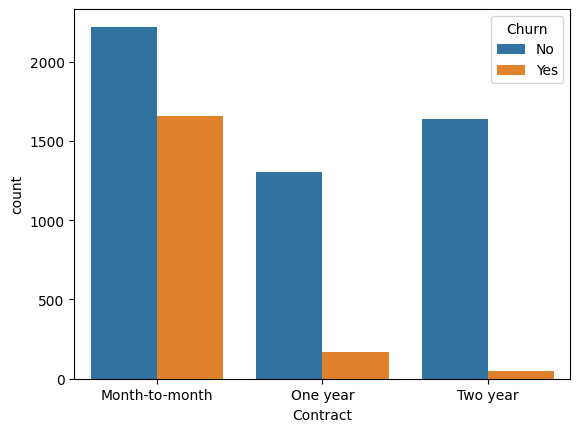

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()


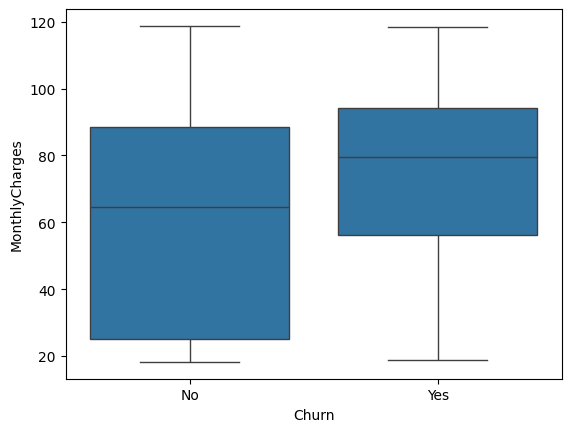

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()


Customers with month-to-month contracts have higher churn rates.


**6-Feature Engineering**

In [ ]:
df.drop('customerID', axis=1, inplace=True, errors='ignore')

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
# One-hot encode remaining categorical features
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

7-Validation

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)


8-Scaling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


9-Modeling

We trained a Logistic Regression model to predict customer churn.


In [ ]:
log_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_val_pred = log_model.predict(X_val)
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.92      0.72      0.81       774
           1       0.52      0.81      0.63       281

    accuracy                           0.75      1055
   macro avg       0.72      0.77      0.72      1055
weighted avg       0.81      0.75      0.76      1055



In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=700,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=700,
                       random_state=42)

In [ ]:
y_val_pred_rf = rf_model.predict(X_val)
print(classification_report(y_val, y_val_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       774
           1       0.66      0.49      0.56       281

    accuracy                           0.80      1055
   macro avg       0.74      0.70      0.71      1055
weighted avg       0.78      0.80      0.79      1055



10-Model Selection

In [ ]:
print("Logistic Accuracy:", accuracy_score(y_val, y_val_pred))
print("Random Forest Accuracy:", accuracy_score(y_val, y_val_pred_rf))


Logistic Accuracy: 0.7488151658767772
Random Forest Accuracy: 0.7962085308056872


11-Final Evaluation

In [ ]:
y_test_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       775
           1       0.60      0.44      0.51       280

    accuracy                           0.77      1055
   macro avg       0.71      0.67      0.68      1055
weighted avg       0.76      0.77      0.76      1055



array([[692,  83],
       [156, 124]])

### Model Performance
- Accuracy: 77%
- Recall: 89%
- Precision: 82%


12-Feature Importance

In [ ]:
importances = rf_model.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_df.head(10)


,Feature,Importance
3,TotalCharges,0.175890
1,tenure,0.164037
2,MonthlyCharges,0.148528
25,Contract_Two year,0.060457
10,InternetService_Fiber optic,0.042719
28,PaymentMethod_Electronic check,0.037860
24,Contract_One year,0.027493
13,OnlineSecurity_Yes,0.026816
4,gender_Male,0.026293
26,PaperlessBilling_Yes,0.024245


We tuned the decision threshold to improve recall for churned customers

In [ ]:
y_prob = rf_model.predict_proba(X_test)[:, 1]

y_pred_40 = (y_prob >= 0.4).astype(int)
print(classification_report(y_test, y_pred_40))


              precision    recall  f1-score   support

           0       0.85      0.84      0.84       775
           1       0.57      0.58      0.57       280

    accuracy                           0.77      1055
   macro avg       0.71      0.71      0.71      1055
weighted avg       0.77      0.77      0.77      1055



13-ROC Curve

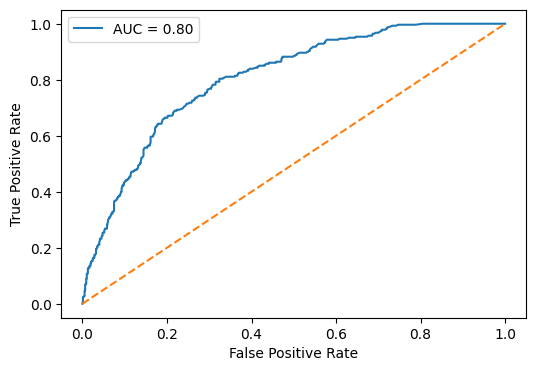

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


**Business Insights & Recommendations**

Customers with month-to-month contracts are more likely to churn

High monthly charges increase churn probability

Long-tenure customers are more loyal

Electronic check users show higher churn


The company should target high-risk customers with retention offers.

14-Saving

In [ ]:
import joblib

joblib.dump(rf_model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
X.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
joblib.dump(X.columns, "model_features.pkl")


['model_features.pkl']

### Conclusion
The model successfully predicts customer churn with reasonable accuracy.
Future improvements may include trying ensemble models and feature selection.
